# CREDIT CARD FRAUD DETECTION

In [4]:
pip install scikit-learn


In [12]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: importlib-resources>=3.2.0 in c:\users\hp\appdata\local\programs\python\python39\lib\site-packages (from matplotlib) (5.12.0)




[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] =14, 8
RANDOM_SEED = 42
LABELS = ["Normal","Fraud"]

In [16]:
# Loading the Dataset to a Pandas Dataframe

In [18]:
credit_card_data = pd.read_csv('creditcard.csv')

In [19]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Dataset Informations.

In [21]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Exploratory Data Analysis. 


In [23]:
credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

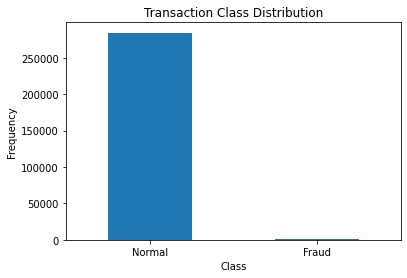

In [26]:
count_classes = pd.value_counts(credit_card_data['Class'],sort = True)

count_classes.plot(kind = 'bar', rot= 0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2),LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [27]:
# So above given frequency we see that Normal transection is much more than fraud Transaction.

#That's why this dataset is unbalanced dataset.

In [29]:
# Distribution of Normal &Frad Transections.

In [30]:
normal = credit_card_data[credit_card_data['Class'] == 0]

fraud = credit_card_data[credit_card_data['Class'] == 1]

In [31]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [32]:
# We need to analyze more amount of information from the transection data
# How different are the amount of money used in different transaction classes?

In [33]:
# Statistical measures of the data.

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

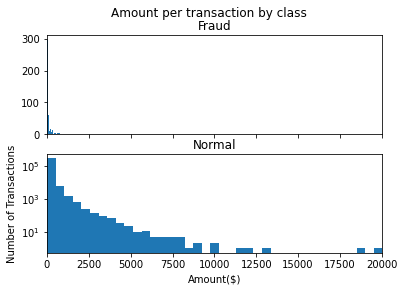

In [35]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

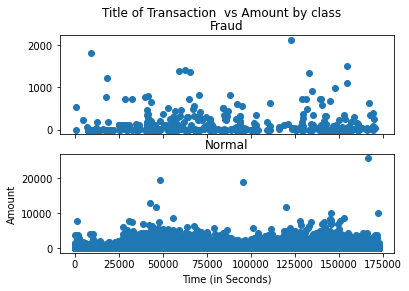

In [37]:
# we will check Do fraudulent transactions occur more often during certain time frame? let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Title of Transaction  vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [38]:
# Compare the Values for both Transactions

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

In [39]:
#Build a sample dataset containing similar distributins of normal Transactions and Fraud Transactions.

# Number of Fraud Transactions --> 492

In [40]:
normal_sample = normal.sample(n = 492)

In [41]:
# Concatenating Two DataFrames.

new_dataset = pd.concat([normal_sample, fraud], axis =0)

In [42]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
147842,89058.0,-0.531466,-0.208706,1.636731,-0.592606,0.375905,1.927089,-0.597363,0.810496,0.694839,...,0.487848,1.510023,0.036138,-1.627055,-0.975214,-0.169678,0.294927,0.201291,47.47,0
221332,142525.0,1.935603,-0.022133,-1.921742,0.393091,0.332086,-0.940506,0.183326,-0.185606,0.422024,...,0.248688,0.733743,-0.104017,-0.480011,0.216829,-0.098689,-0.014593,-0.035754,51.00,0
212860,139020.0,-0.639346,0.055519,1.488222,-0.695332,0.552220,-0.947753,0.396573,-0.158869,0.473814,...,-0.215489,-0.474287,0.192331,-0.042189,-0.876695,0.145865,0.188470,0.033462,18.97,0
112319,72609.0,1.576009,-0.934572,0.006181,-1.726295,-0.837905,-0.021072,-0.986713,-0.078930,-2.161437,...,-0.234139,-0.246297,-0.125422,-0.836575,0.546689,-0.153364,0.032211,-0.000609,5.00,0
234085,147822.0,2.049843,-0.173702,-1.127081,0.421507,-0.240019,-1.207269,0.104587,-0.258109,0.744940,...,-0.303547,-0.823009,0.341252,-0.060027,-0.337907,0.203308,-0.081004,-0.061973,9.99,0


In [43]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [44]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94706.085366,-0.053910,0.106504,0.074355,-0.064892,0.022250,0.023980,0.012478,-0.062355,-0.086094,...,-0.051909,0.072755,-0.036586,0.001555,-0.015135,-0.019394,0.039600,-0.011906,-0.014310,81.726768
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [45]:
X = new_dataset.drop(columns ='Class', axis =1)
Y = new_dataset['Class']

In [46]:
print(X)

            Time        V1        V2        V3        V4        V5        V6   
147842   89058.0 -0.531466 -0.208706  1.636731 -0.592606  0.375905  1.927089  \
221332  142525.0  1.935603 -0.022133 -1.921742  0.393091  0.332086 -0.940506   
212860  139020.0 -0.639346  0.055519  1.488222 -0.695332  0.552220 -0.947753   
112319   72609.0  1.576009 -0.934572  0.006181 -1.726295 -0.837905 -0.021072   
234085  147822.0  2.049843 -0.173702 -1.127081  0.421507 -0.240019 -1.207269   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [47]:
print(Y)

147842    0
221332    0
212860    0
112319    0
234085    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [48]:
# Split the data into Training data & Testing Data.

In [49]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training


Logistic Regression

In [51]:
model = LogisticRegression()

In [52]:
# Training the Logistic Regression Model with Training Data.

model.fit(X_train,Y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Accuracy on Training data.
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [54]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.9479034307496823


In [55]:
# Accuracy on test data.
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [57]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234
